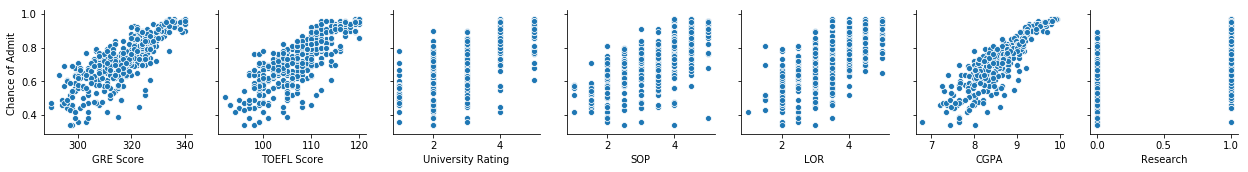

In [187]:
import pandas as pd
data = pd.read_csv("Admission_Predict.csv", index_col = "Serial No.")

X = data.iloc[:,:-1].values
y = data[[data.columns[-1]]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.1)

import seaborn as sns
sns.pairplot(data, 
             x_vars = ["GRE Score","TOEFL Score","University Rating","SOP",data.columns[-4],"CGPA","Research"], 
             y_vars = [data.columns[-1]])

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Note: We have feature extracted the original data so it differs from the original data but all its importance features are conserved

In [189]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [190]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)

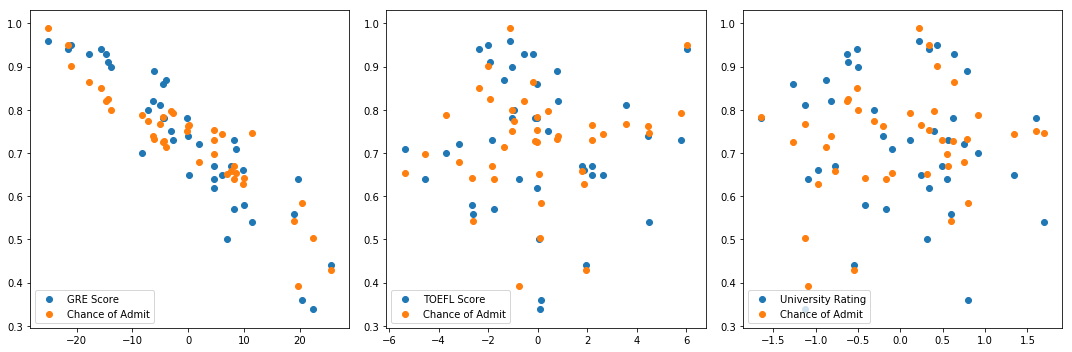

In [191]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize = (15,5))
label = ["GRE Score","TOEFL Score","University Rating"]
for j,feature, target in zip(range(3),label,["Chance of Admit"]*3):
        axes[j].scatter(x_test_pca[:,j], y_test,label = feature)
        axes[j].scatter(x_test_pca[:,j], y_pred,label = target)
        axes[j].legend(loc = "lower left")

fig.tight_layout()

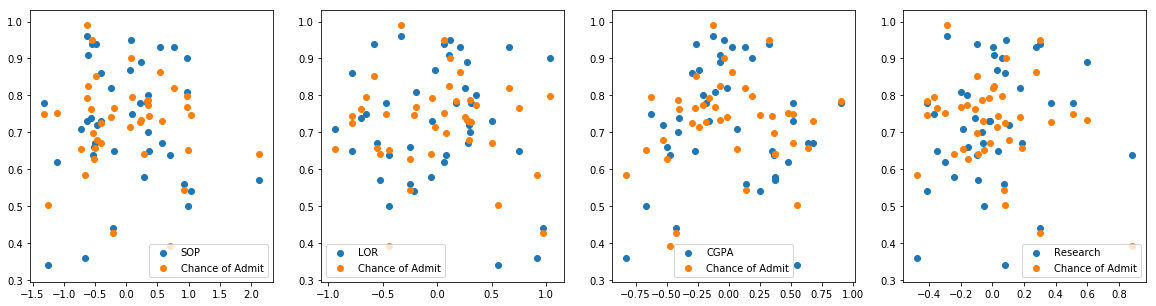

In [192]:
import matplotlib.pyplot as plt
featues = target = ["SOP","LOR","CGPA","Research"]
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
for j,feature, target in zip(range(0,4),featues, ["Chance of Admit"]*4):
    axes[j].scatter(x_test_pca[:,j+3], y_test,label = feature)
    axes[j].scatter(x_test_pca[:,j+3], y_pred,label = target)
    axes[j].legend(loc = "best")

In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=clf, 
                        X = x_test_pca,
                        y = y_test,
                        cv = 10,
                        n_jobs = 1)
print(scores.mean(),"+/-", scores.std())

0.7770535296380487 +/- 0.18596770607182647


(-6.3, 1.1)

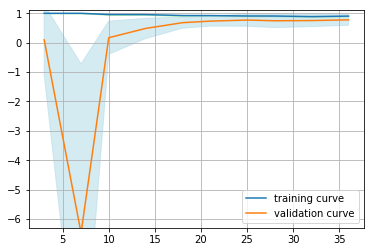

In [194]:
from sklearn.model_selection import learning_curve
import numpy as np
train_size , train_score, test_score = learning_curve(estimator=clf,
                                                      X = x_test_pca,
                                                      y = y_test,
                                                      train_sizes=np.linspace(0.1,1,10),
                                                      cv = 10)
train_mean = np.mean(train_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score , axis = 1)

plt.plot(train_size, train_mean,label = "training curve")
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std,color = "lightgreen",alpha = 0.5)

plt.plot(train_size, test_mean,label = "validation curve")
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std,color = "lightblue",alpha = 0.5)

plt.grid()
plt.legend(loc = "best")
plt.ylim(-6.3,1.1)

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y_test, y_pred)

0.01022219990649923

In [196]:
mean_absolute_error(y_test, y_pred)

0.08144423786699555

In [197]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.10110489556148718

As you can see the mean squared error and mean absoluet error are *pretty* low

If you don't know what *mean squared error* and *mean absolute error* are, then they are as follows:
$$MSE = \frac {\sum_{i=1}^n (y_i - \hat{y})^2} {n}$$
<br>
<br>
$$MAE = \frac {\sum_{i=1}^n |y_i - \hat{y}|}{n}$$